# Automobile Spare Parts Management System

Automobile Spare Parts Management System Project is implemented for managing the dealer, customers, claims, Parts, Transactions and also This system also provides an the company to check or analyze the part is in warranty or not and also provides company to check the Monthly report of Dealers and parts that has been failed &Predict the parts that may fail according to the location, mileage and age. Company to understand Monthly report of top ten failed parts with the help of this system they can check Quality of the parts, Pattern of failure mostly reported failed part in the quarter/year.

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Loading Data


In [2]:
from google.colab import files 
datafile = files.upload()

Saving Dataset.xlsx to Dataset.xlsx


# Reading the Data

In [3]:
df_dealers = pd.read_excel('Dataset.xlsx',sheet_name='Dealers')
df_customers = pd.read_excel('Dataset.xlsx',sheet_name='Customers')
df_claims = pd.read_excel('Dataset.xlsx',sheet_name='Claims')
df_parts = pd.read_excel('Dataset.xlsx',sheet_name='Parts')
df_transactions = pd.read_excel('Dataset.xlsx',sheet_name='Transactions')
df_vendors = pd.read_excel('Dataset.xlsx',sheet_name='Vendors')

# Data Preparation and Cleaning

To read dataset we have to import pandas and by using read_csv() function of pandas we can read data which have csv format. After reading we determined it's shape i.e rows and columns ,it's information. We can also find mean ,median ,mode etc. After that we used drop() function to remove coloumns which are not needed for analysis.

In [5]:
df_parts.head()

,Part_ID,Part_Name,Manufacturer_ID,Manf_Date
0,901,brake pad,501,1996-08-12
1,902,axle,502,1997-03-03
2,903,tie rod,503,1997-06-13
3,904,differential,504,1997-01-14
4,905,rear suspension,505,1996-08-19


In [6]:
df_parts.shape

(11, 4)

In [7]:
df_parts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Part_ID          11 non-null     int64         
 1   Part_Name        11 non-null     object        
 2   Manufacturer_ID  11 non-null     int64         
 3   Manf_Date        11 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 480.0+ bytes


In [8]:
df_claims.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace
0,1,2020-04-01,36000,5,104,901,rpr
1,2,2020-04-01,42000,6,106,902,rplc
2,3,2020-04-01,45000,4,103,903,rpr
3,4,2020-04-01,56000,3,102,904,rplc
4,5,2020-04-01,39000,2,105,905,rpr


In [9]:
df_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20095 entries, 0 to 20094
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   claim_id           20095 non-null  int64         
 1   claim_date         20095 non-null  datetime64[ns]
 2   claim_amount       20095 non-null  int64         
 3   Dealer_ID          20095 non-null  int64         
 4   Cust_ID            20095 non-null  int64         
 5   Part_ID            20095 non-null  int64         
 6   Repair_or_Replace  20095 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.1+ MB


In [10]:
df_claims.shape

(20095, 7)

In [21]:
df_customers.head()

,Cust_ID,Cust_Name,Dealer_ID,Country,State,City,ZipCode
0,101,pushpak,1,ind,goa,panaji,402201
1,102,raj,3,ind,karnataka,banglore,403315
2,103,ranbir,4,ind,gujrat,ahemadabad,326665
3,104,reyansh,5,ind,orrisa,cuttack,543211
4,105,raunak,2,ind,delhi,noida,426232


In [20]:
df_dealers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Dealer_ID       2000 non-null   int64 
 1   Dealer_Name     2000 non-null   object
 2   Dealer_Country  2000 non-null   object
 3   State           2000 non-null   object
 4   City            2000 non-null   object
 5   ZIpCode         2000 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 93.9+ KB


Data has integer values  as well as string 

# Monthly report of top  Dealers who have claimed with high count

In [19]:
df_claims["Dealer_ID"].value_counts().head(10)

5       971
2       922
1       922
3       922
6       394
4       218
1990    176
1237    176
1236    176
1252    176
Name: Dealer_ID, dtype: int64

# Monthly report of top  parts  which have high failed count

In [14]:
df_parts

,Part_ID,Part_Name,Manufacturer_ID,Manf_Date
0,901,brake pad,501,1996-08-12
1,902,axle,502,1997-03-03
2,903,tie rod,503,1997-06-13
3,904,differential,504,1997-01-14
4,905,rear suspension,505,1996-08-19
5,906,radiator,506,1997-03-24
6,907,clutch kits,503,1997-05-12
7,908,pressure plates,502,1997-05-20
8,909,flywheels,505,1997-06-29
9,910,torque converters,506,1997-07-17


In [15]:
df_claims['Part_ID'].value_counts().head(10)

906    4019
905    3349
901    3349
907    3348
904    2010
903    2010
902    2010
Name: Part_ID, dtype: int64

# Exploratory Data Analysis (EDA)


After data preparation and cleaning we will plot graphs for better visualization and understanding, this can be done by importing matplotlib and seaborn libraries of python. These libraries have many functions for ploting graphs between datas of different columns as necessary, which we wil discuss below.

In [16]:
mergedforparts = pd.merge(df_claims,df_parts, how = 'left')
mergedforparts

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Part_Name,Manufacturer_ID,Manf_Date
0,1,2020-04-01,36000,5,104,901,rpr,brake pad,501,1996-08-12
1,2,2020-04-01,42000,6,106,902,rplc,axle,502,1997-03-03
2,3,2020-04-01,45000,4,103,903,rpr,tie rod,503,1997-06-13
3,4,2020-04-01,56000,3,102,904,rplc,differential,504,1997-01-14
4,5,2020-04-01,39000,2,105,905,rpr,rear suspension,505,1996-08-19
...,...,...,...,...,...,...,...,...,...,...
20090,20091,2021-01-24,53000,1274,43974,906,rplc,radiator,506,1997-03-24
20091,20092,2021-01-24,36000,1275,43975,907,rplc,clutch kits,503,1997-05-12
20092,20093,2021-01-24,46000,1276,43976,905,rplc,rear suspension,505,1996-08-19
20093,20094,2021-01-24,56000,1277,43977,904,rplc,differential,504,1997-01-14


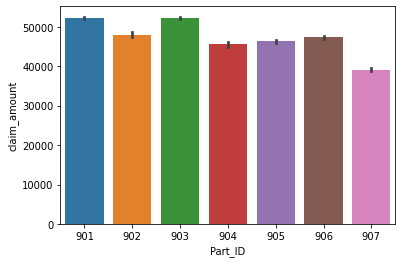

In [17]:
sns.barplot(x='Part_ID',y='claim_amount',data = mergedforparts)

here we see part id 906 is most claimed part 

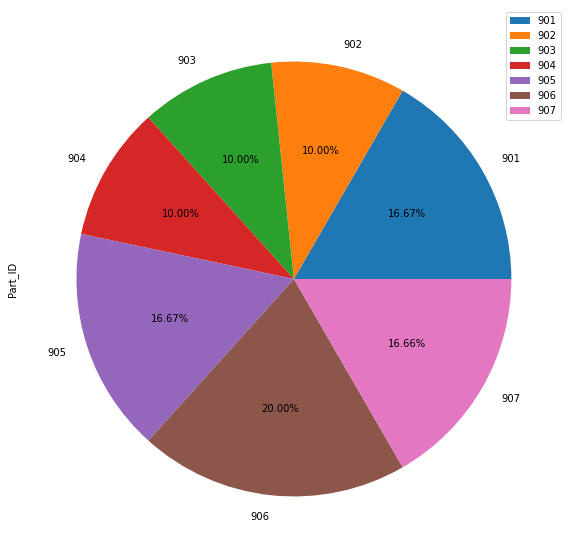

In [ ]:
mergedforparts['Part_ID'].value_counts(sort=False).plot.pie(autopct='%1.2f%%',figsize=(40,10));
plt.legend();

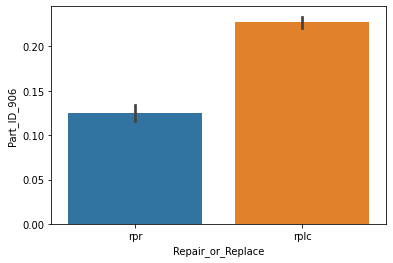

In [ ]:
sns.barplot(x='Repair_or_Replace',y = 'Part_ID_906' ,data = rpr)

In [ ]:
mergedforparts[['Repair_or_Replace','Part_ID']]

,Repair_or_Replace,Part_ID
0,rpr,901
1,rplc,902
2,rpr,903
3,rplc,904
4,rpr,905
...,...,...
20090,rplc,906
20091,rplc,907
20092,rplc,905
20093,rplc,904


# **Transaction amount of repair and replace by part**

In [ ]:
mergedfortransaction = pd.merge(df_claims,df_transactions, how = 'left',on ='claim_id')
mergedfortransaction.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,transaction_id,transaction_date,transaction_amount
0,1,2020-04-01,36000,5,104,901,rpr,101,2020-04-01,36000
1,2,2020-04-01,42000,6,106,902,rplc,102,2020-04-01,42000
2,3,2020-04-01,45000,4,103,903,rpr,103,2020-04-01,45000
3,4,2020-04-01,56000,3,102,904,rplc,104,2020-04-01,56000
4,5,2020-04-01,39000,2,105,905,rpr,105,2020-04-01,39000


In [ ]:
mergedfortransaction.Repair_or_Replace.unique()

array(['rpr', 'rplc'], dtype=object)

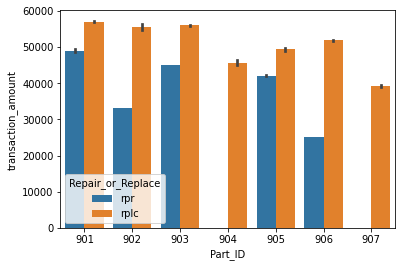

In [ ]:
sns.barplot(x="Part_ID",y = 'transaction_amount',hue ='Repair_or_Replace',data = mergedfortransaction)

# **Predicting the parts that may fail according to the location**

In [ ]:
mergedfortransaction["Vendor_Location"] = mergedfortransaction['Dealer_ID'].map(df_dealers['City'])
mergedfortransaction.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,transaction_id,transaction_date,transaction_amount,Vendor_Location
0,1,2020-04-01,36000,5,104,901,rpr,101,2020-04-01,36000,Mumbai
1,2,2020-04-01,42000,6,106,902,rplc,102,2020-04-01,42000,Panji
2,3,2020-04-01,45000,4,103,903,rpr,103,2020-04-01,45000,Cuttack
3,4,2020-04-01,56000,3,102,904,rplc,104,2020-04-01,56000,Ahemdabad
4,5,2020-04-01,39000,2,105,905,rpr,105,2020-04-01,39000,Bangalore


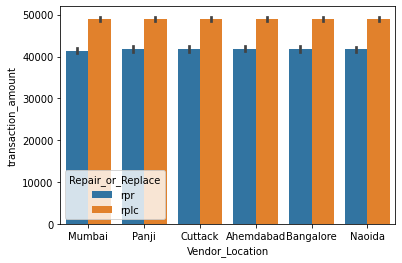

In [ ]:
sns.barplot(y='transaction_amount',x = 'Vendor_Location',hue = 'Repair_or_Replace',data = mergedfortransaction)

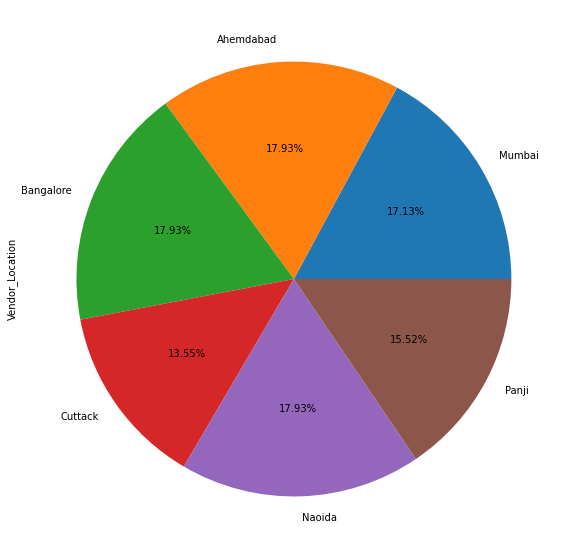

In [ ]:
mergedfortransaction['Vendor_Location'].value_counts(sort=False).plot.pie(autopct='%1.2f%%',figsize=(40,10)); 


# **Predicting the parts that may fail according to the Age**







In [ ]:
mergedforAge = pd.merge(mergedfortransaction,df_parts,how ='left',on ='Part_ID')

In [ ]:
mergedforAge['Age'] = mergedforAge['claim_date'] - mergedforAge['Manf_Date'] 

In [ ]:
mergedforAge

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,transaction_id,transaction_date,transaction_amount,Vendor_Location,Part_Name,Manufacturer_ID,Manf_Date,Age
0,1,2020-04-01,36000,5,104,901,rpr,101,2020-04-01,36000,Mumbai,brake pad,501,1996-08-12,8633 days
1,2,2020-04-01,42000,6,106,902,rplc,102,2020-04-01,42000,Panji,axle,502,1997-03-03,8430 days
2,3,2020-04-01,45000,4,103,903,rpr,103,2020-04-01,45000,Cuttack,tie rod,503,1997-06-13,8328 days
3,4,2020-04-01,56000,3,102,904,rplc,104,2020-04-01,56000,Ahemdabad,differential,504,1997-01-14,8478 days
4,5,2020-04-01,39000,2,105,905,rpr,105,2020-04-01,39000,Bangalore,rear suspension,505,1996-08-19,8626 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20090,20091,2021-01-24,53000,1274,43974,906,rplc,20091,2021-01-24,53000,Cuttack,radiator,506,1997-03-24,8707 days
20091,20092,2021-01-24,36000,1275,43975,907,rplc,20092,2021-01-24,36000,Mumbai,clutch kits,503,1997-05-12,8658 days
20092,20093,2021-01-24,46000,1276,43976,905,rplc,20093,2021-01-24,46000,Panji,rear suspension,505,1996-08-19,8924 days
20093,20094,2021-01-24,56000,1277,43977,904,rplc,20094,2021-01-24,56000,Naoida,differential,504,1997-01-14,8776 days


In [ ]:
import datetime 
mergedforAge["Age"] = mergedforAge["Age"].apply(lambda x: x.days)

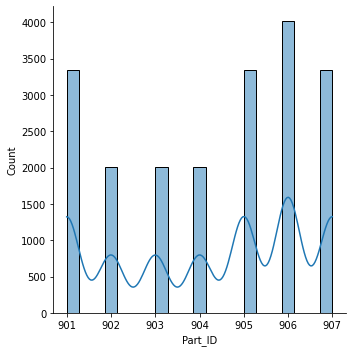

In [ ]:
sns.displot(mergedforAge['Part_ID'],kde =True)

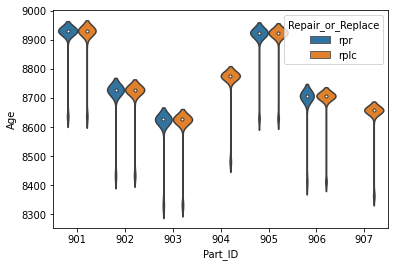

In [ ]:
sns.violinplot(y='Age',x = 'Part_ID',hue = 'Repair_or_Replace',data = mergedforAge)

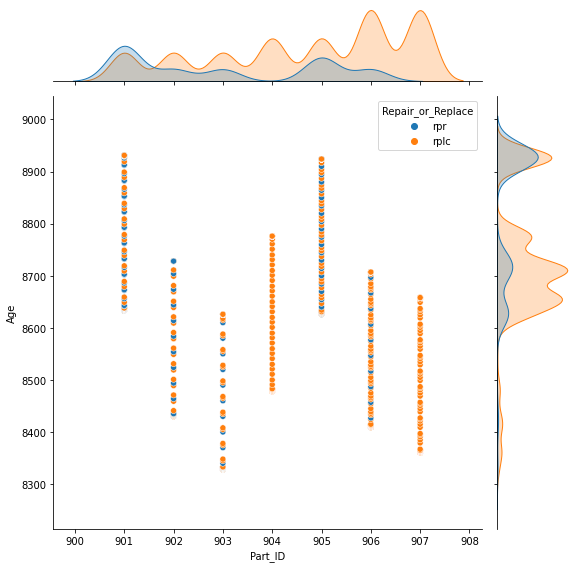

In [ ]:
sns.jointplot(y='Age',x = 'Part_ID',hue = 'Repair_or_Replace',data = mergedforAge,height=8)

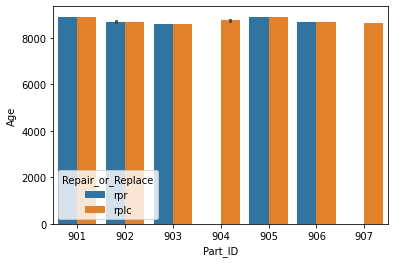

In [ ]:
sns.barplot(y='Age',x = 'Part_ID',hue = 'Repair_or_Replace',data = mergedforAge)

In [ ]:
mergedforAge

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,transaction_id,transaction_date,transaction_amount,Vendor_Location,Part_Name,Manufacturer_ID,Manf_Date,Age
0,1,2020-04-01,36000,5,104,901,rpr,101,2020-04-01,36000,Mumbai,brake pad,501,1996-08-12,8633
1,2,2020-04-01,42000,6,106,902,rplc,102,2020-04-01,42000,Panji,axle,502,1997-03-03,8430
2,3,2020-04-01,45000,4,103,903,rpr,103,2020-04-01,45000,Cuttack,tie rod,503,1997-06-13,8328
3,4,2020-04-01,56000,3,102,904,rplc,104,2020-04-01,56000,Ahemdabad,differential,504,1997-01-14,8478
4,5,2020-04-01,39000,2,105,905,rpr,105,2020-04-01,39000,Bangalore,rear suspension,505,1996-08-19,8626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20090,20091,2021-01-24,53000,1274,43974,906,rplc,20091,2021-01-24,53000,Cuttack,radiator,506,1997-03-24,8707
20091,20092,2021-01-24,36000,1275,43975,907,rplc,20092,2021-01-24,36000,Mumbai,clutch kits,503,1997-05-12,8658
20092,20093,2021-01-24,46000,1276,43976,905,rplc,20093,2021-01-24,46000,Panji,rear suspension,505,1996-08-19,8924
20093,20094,2021-01-24,56000,1277,43977,904,rplc,20094,2021-01-24,56000,Naoida,differential,504,1997-01-14,8776


In [ ]:
mergedforAge = pd.get_dummies(mergedforAge,columns = ["Vendor_Location","Repair_or_Replace"],drop_first = True)
mergedforAge

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,transaction_id,transaction_date,transaction_amount,Part_Name,Manufacturer_ID,Manf_Date,Age,Vendor_Location_Bangalore,Vendor_Location_Cuttack,Vendor_Location_Mumbai,Vendor_Location_Naoida,Vendor_Location_Panji,Repair_or_Replace_rpr
0,1,2020-04-01,36000,5,104,901,101,2020-04-01,36000,brake pad,501,1996-08-12,8633,0,0,1,0,0,1
1,2,2020-04-01,42000,6,106,902,102,2020-04-01,42000,axle,502,1997-03-03,8430,0,0,0,0,1,0
2,3,2020-04-01,45000,4,103,903,103,2020-04-01,45000,tie rod,503,1997-06-13,8328,0,1,0,0,0,1
3,4,2020-04-01,56000,3,102,904,104,2020-04-01,56000,differential,504,1997-01-14,8478,0,0,0,0,0,0
4,5,2020-04-01,39000,2,105,905,105,2020-04-01,39000,rear suspension,505,1996-08-19,8626,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20090,20091,2021-01-24,53000,1274,43974,906,20091,2021-01-24,53000,radiator,506,1997-03-24,8707,0,1,0,0,0,0
20091,20092,2021-01-24,36000,1275,43975,907,20092,2021-01-24,36000,clutch kits,503,1997-05-12,8658,0,0,1,0,0,0
20092,20093,2021-01-24,46000,1276,43976,905,20093,2021-01-24,46000,rear suspension,505,1996-08-19,8924,0,0,0,0,1,0
20093,20094,2021-01-24,56000,1277,43977,904,20094,2021-01-24,56000,differential,504,1997-01-14,8776,0,0,0,1,0,0


In [ ]:
mergedforAge.columns

Index(['claim_id', 'claim_date', 'claim_amount', 'Dealer_ID', 'Cust_ID',
       'Part_ID', 'transaction_id', 'transaction_date', 'transaction_amount',
       'Part_Name', 'Manufacturer_ID', 'Manf_Date', 'Age',
       'Vendor_Location_Bangalore', 'Vendor_Location_Cuttack',
       'Vendor_Location_Mumbai', 'Vendor_Location_Naoida',
       'Vendor_Location_Panji', 'Repair_or_Replace_rpr'],
      dtype='object')

In [ ]:
mergedforAge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20095 entries, 0 to 20094
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   claim_id                   20095 non-null  int64         
 1   claim_date                 20095 non-null  datetime64[ns]
 2   claim_amount               20095 non-null  int64         
 3   Dealer_ID                  20095 non-null  int64         
 4   Cust_ID                    20095 non-null  int64         
 5   Part_ID                    20095 non-null  int64         
 6   transaction_id             20095 non-null  int64         
 7   transaction_date           20095 non-null  datetime64[ns]
 8   transaction_amount         20095 non-null  int64         
 9   Part_Name                  20095 non-null  object        
 10  Manufacturer_ID            20095 non-null  int64         
 11  Manf_Date                  20095 non-null  datetime64[ns]
 12  Age 

# **Predicting Part Failure**

In [ ]:
x=mergedforAge[['Part_ID','Age','Vendor_Location_Bangalore','Vendor_Location_Cuttack','Vendor_Location_Mumbai','Vendor_Location_Naoida','Vendor_Location_Panji']]
y=mergedforAge['Repair_or_Replace_rpr']

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
cross_val_score(classifier,x,y,cv=10,scoring='accuracy').mean()

0.7639220274931959

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
cross_val_score(knn,x,y,cv=10,scoring='accuracy').mean()

0.7359561822544818

here we see best accuracy by DecisionTreeCLassifier ,so we are using decision tree classifier for further process

# **To determine whether the defective part is to be replaced or repaired**

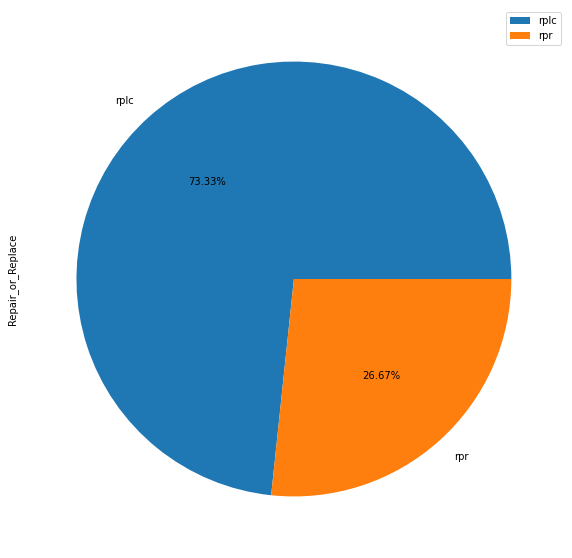

In [ ]:
df_claims['Repair_or_Replace'].value_counts(sort=False).plot.pie(autopct='%1.2f%%',figsize=(40,10));
plt.legend()

In [ ]:
df_claims['Repair_or_Replace'].value_counts().head()

rplc    14736
rpr      5359
Name: Repair_or_Replace, dtype: int64

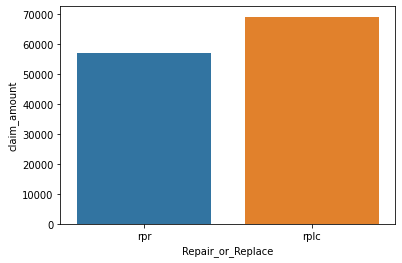

In [ ]:
sns.barplot(x='Repair_or_Replace',y='claim_amount',data=df_claims,estimator=np.max)

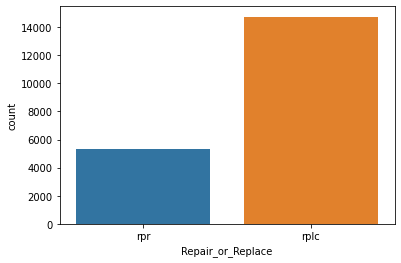

In [ ]:
sns.countplot(x='Repair_or_Replace',data=df_claims)

In [ ]:
x1 = mergedforAge[['Part_ID','Age','Vendor_Location_Bangalore','Vendor_Location_Cuttack','Vendor_Location_Mumbai','Vendor_Location_Naoida','Vendor_Location_Panji','transaction_amount']]
y1 = mergedforAge['Repair_or_Replace_rpr']                               

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
cross_val_score(classifier,x1,y1,cv=10,scoring='accuracy').mean()*100

98.4129353233831

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
cross_val_score(rfc,x1,y1,cv=10,scoring='accuracy').mean()*100

98.62686567164178

# **Processing of variety of data:**

In [ ]:
df_claims

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace
0,1,2020-04-01,36000,5,104,901,rpr
1,2,2020-04-01,42000,6,106,902,rplc
2,3,2020-04-01,45000,4,103,903,rpr
3,4,2020-04-01,56000,3,102,904,rplc
4,5,2020-04-01,39000,2,105,905,rpr
...,...,...,...,...,...,...,...
20090,20091,2021-01-24,53000,1274,43974,906,rplc
20091,20092,2021-01-24,36000,1275,43975,907,rplc
20092,20093,2021-01-24,46000,1276,43976,905,rplc
20093,20094,2021-01-24,56000,1277,43977,904,rplc


In [ ]:
all = pd.merge(df_claims,df_dealers, on ="Dealer_ID",how ='left' )
all.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Dealer_Name,Dealer_Country,State,City,ZIpCode
0,1,2020-04-01,36000,5,104,901,rpr,Lynn Knapp,india,Orrisa,Cuttack,400005
1,2,2020-04-01,42000,6,106,902,rplc,Harold Hamff,india,Maharashtra,Mumbai,400006
2,3,2020-04-01,45000,4,103,903,rpr,Rachel Oszust,india,Gujrat,Ahemdabad,400004
3,4,2020-04-01,56000,3,102,904,rplc,Donald Repinski,india,Karnataka,Bangalore,400003
4,5,2020-04-01,39000,2,105,905,rpr,Owen Mclaughlin,india,Delhi,Naoida,400002


In [ ]:
all[['claim_amount','State']]

,claim_amount,State
0,36000,Orrisa
1,42000,Maharashtra
2,45000,Gujrat
3,56000,Karnataka
4,39000,Delhi
...,...,...
20090,53000,Gujrat
20091,36000,Orrisa
20092,46000,Maharashtra
20093,56000,Goa


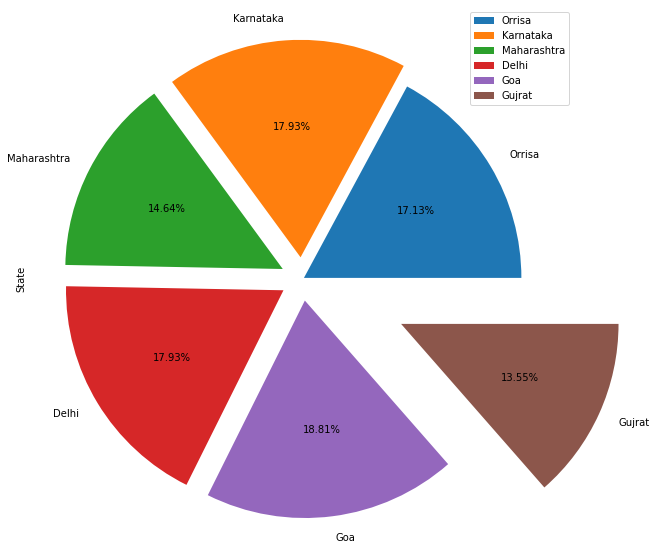

In [ ]:
all['State'].value_counts(sort=False).plot.pie(autopct='%1.2f%%',figsize=(40,10),explode=[0.01,0.1,0.1,0.1,0.1,0.5]);
plt.legend();

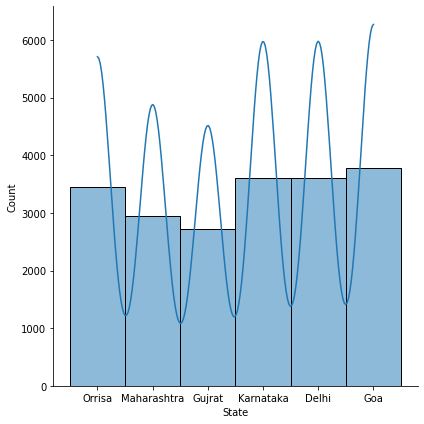

In [ ]:
sns.displot(all['State'],kde =True,height= 6)

In [ ]:
all = pd.get_dummies(all, columns=['Repair_or_Replace','State'],drop_first=True)

In [ ]:
all.corr()


,claim_id,claim_amount,Dealer_ID,Cust_ID,Part_ID,ZIpCode,Repair_or_Replace_rpr,State_Goa,State_Gujrat,State_Karnataka,State_Maharashtra,State_Orrisa
claim_id,1.000000,0.000214,0.002988,-0.000791,0.000189,0.000158,-0.000169,0.000002,0.000421,-0.000329,0.000145,-0.000085
claim_amount,0.000214,1.000000,-0.000154,-0.001481,-0.285543,-0.001569,-0.264751,0.000157,0.000091,0.001947,0.000472,-0.003632
Dealer_ID,0.002988,-0.000154,1.000000,0.007710,-0.002561,0.066264,0.000630,-0.014101,0.114150,-0.092952,0.099579,-0.066521
Cust_ID,-0.000791,-0.001481,0.007710,1.000000,0.002312,-0.004365,-0.001301,0.001977,-0.006923,0.004214,-0.002884,0.000433
Part_ID,0.000189,-0.285543,-0.002561,0.002312,1.000000,-0.002952,-0.364181,0.003273,0.001491,-0.003587,-0.000393,-0.002541
ZIpCode,0.000158,-0.001569,0.066264,-0.004365,-0.002952,1.000000,0.000325,-0.663095,0.147370,-0.098645,0.637278,0.434479
Repair_or_Replace_rpr,-0.000169,-0.264751,0.000630,-0.001301,-0.364181,0.000325,1.000000,0.001422,-0.000059,0.003855,-0.003050,0.003527
State_Goa,0.000002,0.000157,-0.014101,0.001977,0.003273,-0.663095,0.001422,1.000000,-0.190569,-0.224982,-0.199344,-0.218871
State_Gujrat,0.000421,0.000091,0.114150,-0.006923,0.001491,0.147370,-0.000059,-0.190569,1.000000,-0.185052,-0.163965,-0.180026
State_Karnataka,-0.000329,0.001947,-0.092952,0.004214,-0.003587,-0.098645,0.003855,-0.224982,-0.185052,1.000000,-0.193574,-0.212535


In [ ]:
States = all[['Repair_or_Replace_rpr','State_Goa','State_Gujrat','State_Karnataka','State_Maharashtra','State_Orrisa']]

In [ ]:
States

,Repair_or_Replace_rpr,State_Goa,State_Gujrat,State_Karnataka,State_Maharashtra,State_Orrisa
0,1,0,0,0,0,1
1,0,0,0,0,1,0
2,1,0,1,0,0,0
3,0,0,0,1,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
20090,0,0,1,0,0,0
20091,0,0,0,0,0,1
20092,0,0,0,0,1,0
20093,0,1,0,0,0,0


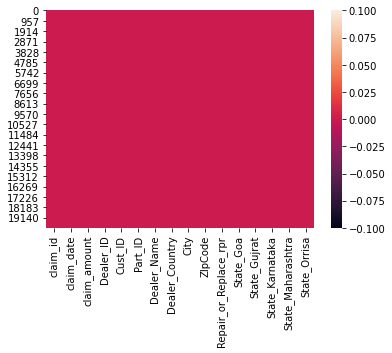

In [ ]:
sns.heatmap(all.isnull())

In [ ]:
x2 = all[['Part_ID','State_Goa','State_Gujrat','State_Karnataka','State_Maharashtra','State_Orrisa']]
y2 = all['Repair_or_Replace_rpr'] 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
cross_val_score(classifier,x2,y2,cv=10,scoring='accuracy').mean()*100

76.66085946573752

# Conclusion


Majority of the Parts are being replaced.

Parts in Goa are among the most claimed parts.